In [ ]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘bitops’, ‘formatR’, ‘RCurl’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘abind’, ‘SparseArray’, ‘lambda.r’, ‘futile.options’, ‘GenomeInfoDb’, ‘XVector’, ‘S4Arrays’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘matrixStats’, ‘locfit’, ‘Rcpp’, ‘MatrixGenerics’, ‘RcppArmadillo’


Old packages: 'bit', 'commonmark', 'curl', 'data.table', 'devtools', 'gargle',
  'highr', 'isoband', 'openssl', 'pkgload', 'ps', 'ragg', 'roxygen2',
  'textshaping', 'tidyr', 'timechange', 'whis

In [ ]:
library(DESeq2)


Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loa

In [ ]:
count_data <- read.csv('count_data.csv', row.names = 1)

In [ ]:
col_data <- read.csv('col_data.csv')

In [ ]:
rownames(col_data)

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19"

In [ ]:
rownames(col_data) <- col_data$Sample

In [ ]:
rownames(col_data)

[1] "NBS1_read" "NBS2"      "NBS3"      "26"        "IP2-53"    "56_s"     
 [7] "83"        "171"       "IP2-42"    "IP2-48"    "IP2-49"    "IP2-65"   
[13] "IP2-66"    "IP2-71"    "IP2-50"    "IP2-76"    "IP2-78"    "IP2-83"   
[19] "IP2-90"

In [ ]:
all(colnames(count_data) == rownames(col_data))

[1] FALSE

In [ ]:
colnames(count_data) <- rownames(col_data)

In [ ]:
all(colnames(count_data) == rownames(col_data))

[1] TRUE

In [ ]:
dds <- DESeqDataSetFromMatrix(countData = count_data,
                              colData = DataFrame(col_data),
                              design = ~ Conditions)

ERROR: Error in DESeqDataSet(se, design = design, ignoreRank): some values in assay are not integers


In [ ]:
count_data <- round(count_data)

In [ ]:
dds <- DESeqDataSetFromMatrix(countData = count_data,
                              colData = DataFrame(col_data),
                              design = ~ Conditions)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



In [ ]:
library(ggplot2)

In [ ]:
dds <- DESeq(dds)

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

final dispersion estimates

fitting model and testing



In [ ]:
res <- results(dds)

In [ ]:
resOrdered <- res[order(res$pvalue),]

In [ ]:
write.csv(as.data.frame(resOrdered), file = "DESeq2_results.csv")

In [ ]:
volcanoData <- as.data.frame(resOrdered)

In [ ]:
volcanoData$gene <- row.names(volcanoData)

Warning message:
“Removed 11568 rows containing missing values (`geom_point()`).”


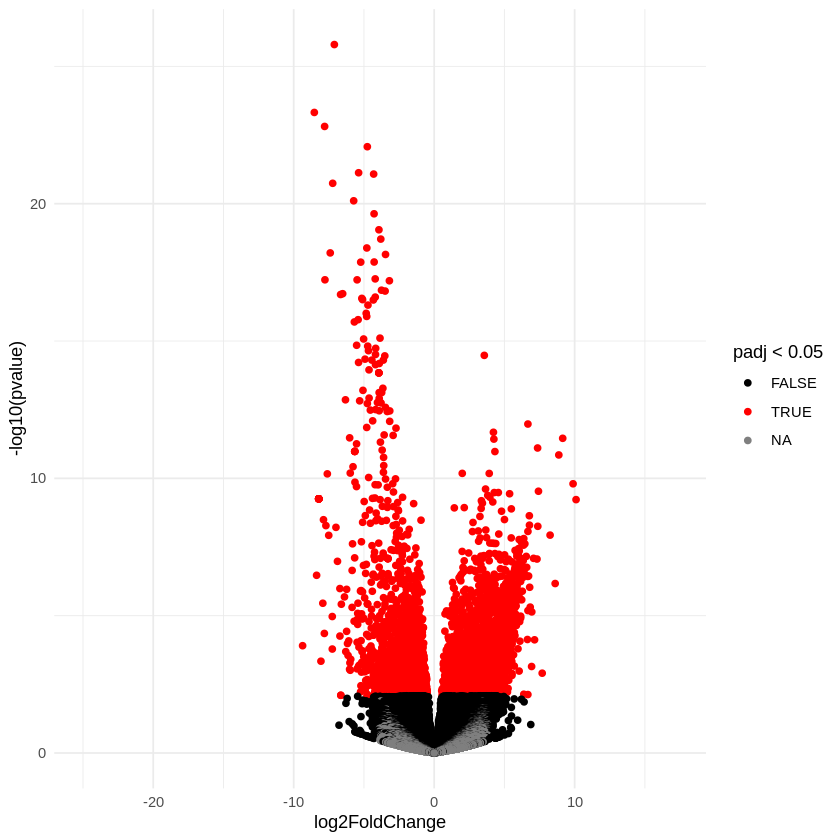

In [ ]:
ggplot(volcanoData, aes(x = log2FoldChange, y = -log10(pvalue))) +
  geom_point(aes(color = padj < 0.05)) +
  scale_color_manual(values = c("black", "red")) +
  theme_minimal()

using ntop=500 top features by variance



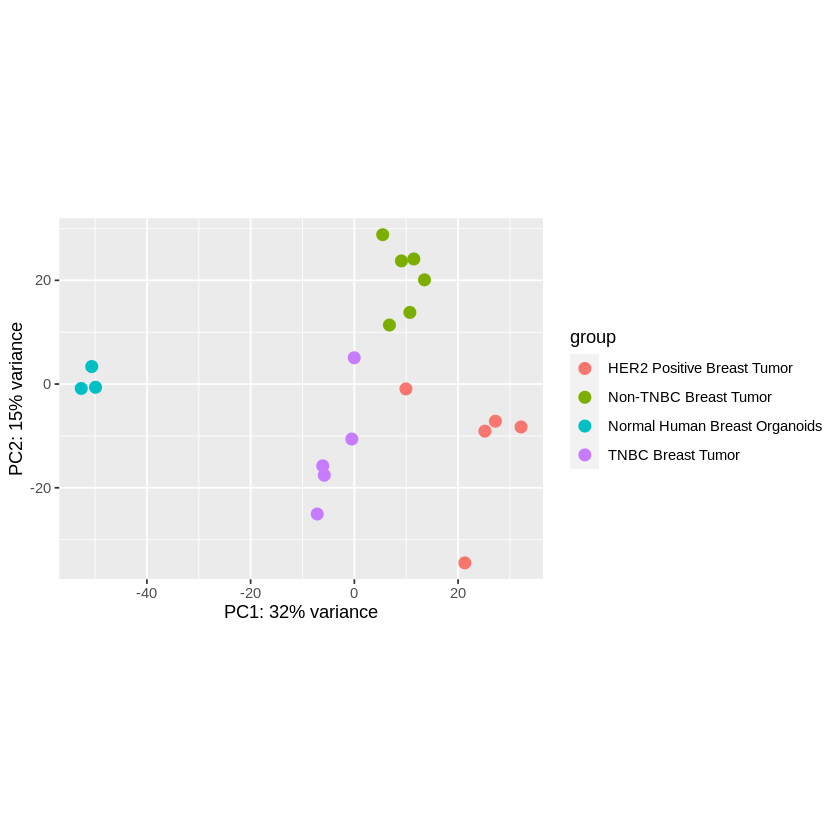

In [ ]:
rld <- rlog(dds)
plotPCA(rld, intgroup = "Conditions")

In [ ]:
install.packages("pheatmap")
library(pheatmap)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
norm_counts <- counts(dds, normalized=TRUE)

In [ ]:
# Selecting the top n differentially expressed genes to display
top_n <- 50  # for example, the top 50
select_genes <- head(order(res$pvalue), top_n)

In [ ]:
# Log transformation for better visualization
log_norm_counts <- log2(norm_counts[select_genes, ] + 1)

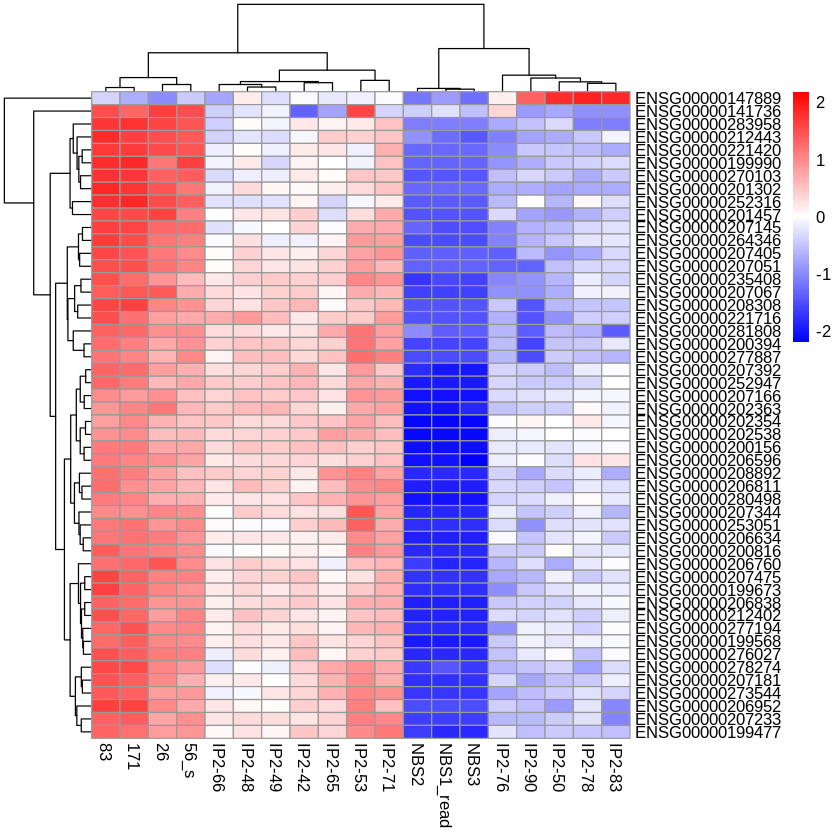

In [ ]:
# Creating the heatmap
pheatmap(log_norm_counts,
         cluster_rows=TRUE,
         cluster_cols=TRUE,
         scale="row",
         show_rownames=TRUE,
         show_colnames=TRUE,
         color = colorRampPalette(c("blue", "white", "red"))(255))